In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [12]:
df=pd.read_excel('Data_Train.xlsx')

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
df.describe().round(2)

,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,5977.00,6019.00
mean,2013.36,58738.38,5.28,9.48
std,3.27,91268.84,0.81,11.19
min,1998.00,171.00,0.00,0.44
25%,2011.00,34000.00,5.00,3.50
50%,2014.00,53000.00,5.00,5.64
75%,2016.00,73000.00,5.00,9.95
max,2019.00,6500000.00,10.00,160.00


In [15]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [16]:
df_new=df.copy()

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
Name                 824 non-null object
Location             824 non-null object
Year                 824 non-null int64
Kilometers_Driven    824 non-null int64
Fuel_Type            824 non-null object
Transmission         824 non-null object
Owner_Type           824 non-null object
Mileage              823 non-null object
Engine               824 non-null object
Power                824 non-null object
Seats                824 non-null int64
New_Price            824 non-null object
Price                824 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 83.8+ KB


In [8]:
df_new['Brand']=df_new['Name'].apply(lambda x:' '.join(x.split()[:1]))
df_new['Model']=df_new['Name'].apply(lambda x:' '.join(x.split()[1:2]))
df_new['Variant']=df_new['Name'].apply(lambda x:' '.join(x.split()[2:]))

In [9]:
df_new['Name']=df_new['Name'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Brand']=df_new['Brand'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Model']=df_new['Model'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Variant']=df_new['Variant'].apply(lambda x:' '.join(x.lower() for x in x.split()))

In [10]:
df_new.head(6)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
0,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,honda,jazz,v
1,toyota innova crysta 2.8 gx at 8s,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,21 Lakh,17.50,toyota,innova,crysta 2.8 gx at 8s
2,maruti ciaz zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5,10.65 Lakh,9.95,maruti,ciaz,zeta
3,mitsubishi pajero sport 4x4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7,32.01 Lakh,15.00,mitsubishi,pajero,sport 4x4
4,bmw 3 series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5,47.87 Lakh,18.55,bmw,3,series 320d
5,honda wrv i-vtec vx,Kochi,2018,37430,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5,10.57 Lakh,9.90,honda,wrv,i-vtec vx


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            5293 non-null object
Price                6019 non-null float64
Brand                6019 non-null object
Model                6019 non-null object
Variant              6019 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 752.5+ KB


In [122]:
df_new['Power'] = df_new['Power'].replace('bhp','', regex=True)
df_new['Engine'] = df_new['Engine'].replace('CC','',regex=True)
df_new['Mileage'] = df_new['Mileage'].replace('kmpl','', regex=True)
df_new['Mileage'] = df_new['Mileage'].replace('km/kg','', regex=True)
df_new['Power']=pd.to_numeric(df_new['Power'],downcast='integer',errors='coerce')
df_new['Engine']=pd.to_numeric(df_new['Engine'],downcast='integer',errors='coerce')
df_new['Mileage']=pd.to_numeric(df_new['Mileage'],downcast='integer',errors='coerce')

In [196]:
# # defining function to check price 
# def fun(num): 

#     if (str(num).find('Lakh'))!=-1:
#         num=float(str(num).replace(' Lakh',''))
#     elif (str(num).find('Cr'))!=-1:
#         num=float(str(num).replace(' Cr',''))*100
#     return num

In [192]:
# defining function to check price 
# def fun(num): 

#     if ('Lakh' in str(num)):
#         num=float(str(num).replace(' Lakh',''))
#     elif ('Cr' in str(num)):
#         num=float(str(num).replace(' Cr',''))*100
#     return num

In [200]:
# df_new2['New_Price']= df_new2['New_Price'].apply(fun) 

In [212]:
df_new['New_Price1']= df_new['New_Price'].apply(lambda x: float(str(x).replace(' Lakh','')) if (str(x).find('Lakh'))!=-1 else (float(str(x).replace(' Cr',''))*100 if (str(x).find('Cr'))!=-1 else 'Nan')) 

In [69]:
df_new.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [70]:
df_orig=pd.read_excel('train_data_eda.xlsx')

In [71]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Sr No                6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                5976 non-null float64
Price                6019 non-null float64
New_Price            5293 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


In [72]:
df_orig.isnull().sum()

Sr No                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                 43
Price                  0
New_Price            726
dtype: int64

In [73]:
df_orig['Power']=df_orig['Power'].str.replace('null bhp','0 bhp')
df_orig['Power'].fillna('0 bhp',inplace=True)
df_orig['Mileage'].fillna('0.0 kmpl',inplace=True)
df_orig['Engine'].fillna('0 CC',inplace=True)
df_orig['Seats'].fillna(0,inplace=True)

In [74]:
df_orig.isnull().sum()

Sr No                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Price                  0
New_Price            726
dtype: int64

In [75]:
df_orig[df_orig['Seats']==0]

,Sr No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
194,194,honda city 1.5 gxi,Ahmedabad,2007,60006,Petrol,Manual,First,NaN kmpl,NaN CC,NaN bhp,0.0,2.95,6.89 Lakh
208,208,maruti swift 1.3 vxi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN CC,NaN bhp,0.0,2.11,NaN
229,229,ford figo,Bangalore,2015,70436,Diesel,Manual,First,NaN kmpl,1498 CC,99 bhp,0.0,3.60,5.23 Lakh
733,733,maruti swift 1.3 vxi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN CC,NaN bhp,0.0,1.75,NaN
749,749,land rover range rover 3.0 d,Mumbai,2008,55001,Diesel,Automatic,Second,NaN kmpl,NaN CC,NaN bhp,0.0,26.50,1.05 Cr
1294,1294,honda city 1.3 dx,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN CC,NaN bhp,0.0,3.20,9.41 Lakh
1327,1327,maruti swift 1.3 zxi,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN CC,NaN bhp,0.0,5.80,NaN
1385,1385,honda city 1.5 gxi,Pune,2004,115000,Petrol,Manual,Second,NaN kmpl,NaN CC,NaN bhp,0.0,1.50,6.89 Lakh
1460,1460,land rover range rover sport 2005 2012 sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN kmpl,NaN CC,NaN bhp,0.0,40.88,86.71 Lakh
1917,1917,honda city 1.5 exi,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,0.0,1.70,8.99 Lakh


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


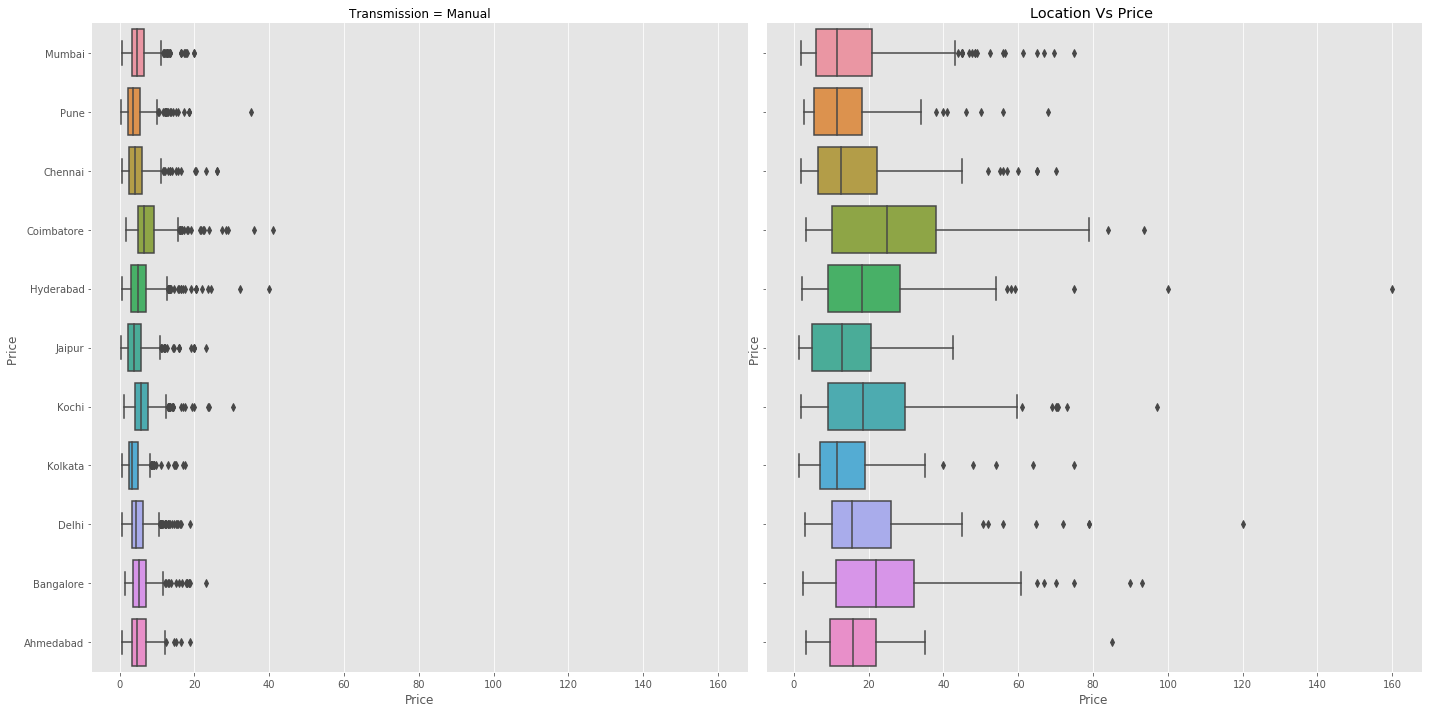

In [76]:
mx = sns.catplot(y="Location",x="Price", data=df_new, kind="box",col='Transmission', height=10,aspect=1)
mx.set(ylabel='Price ')
plt.title('Location Vs Price ');
plt.show()

In [77]:
df_new[(df_new['Location']=='Hyderabad')&(df_new['Transmission']=='Manual')].Price.describe()

count    546.000000
mean       5.645513
std        3.957182
min        0.600000
25%        3.000000
50%        4.900000
75%        6.937500
max       40.000000
Name: Price, dtype: float64

In [78]:
df_new[(df_new['Location']=='Hyderabad')&(df_new['Transmission']=='Manual')&(df_new['Price']>(6.95+1.5*(6.95-3.10)))].count()

Name                 27
Location             27
Year                 27
Kilometers_Driven    27
Fuel_Type            27
Transmission         27
Owner_Type           27
Mileage              27
Engine               27
Power                27
Seats                27
Price                27
New_Price            25
Brand                27
Model                27
Variant              27
dtype: int64

In [79]:
df_new.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                 43
Price                  0
New_Price            726
Brand                  0
Model                  0
Variant                0
dtype: int64

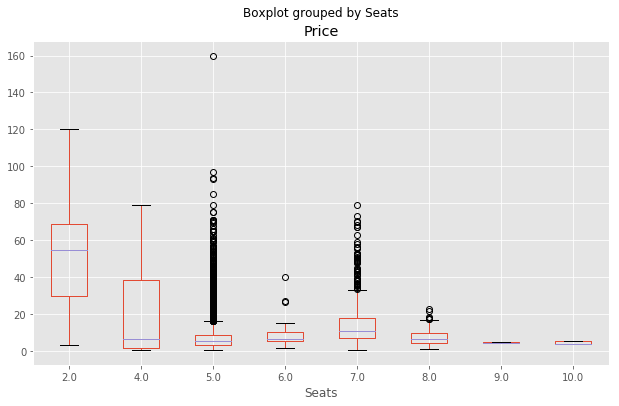

In [80]:
df_new.boxplot(column='Price',by='Seats',fontsize=10,figsize=(10,6))
plt.show()

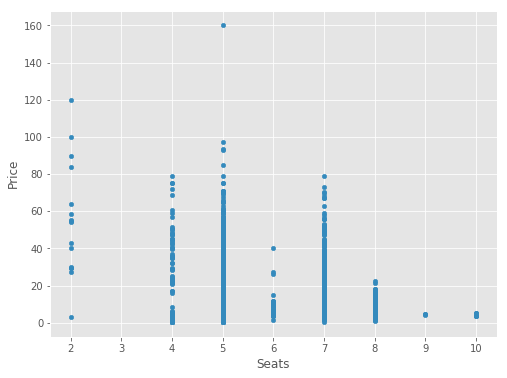

In [85]:
df.plot(x='Seats',y='Price',kind='Scatter')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


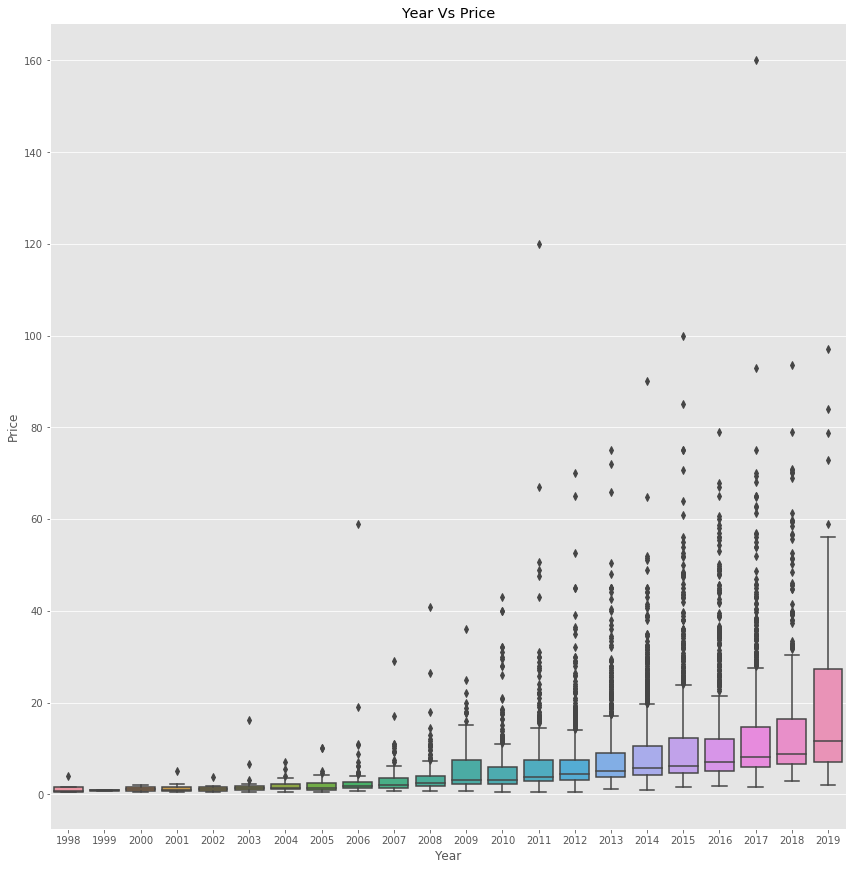

In [86]:
mx = sns.catplot(x="Year", y="Price", data=df_new, kind="box", height=12 ,aspect=1)
mx.set(xlabel= 'Year')
mx.set(ylabel= 'Price')
plt.title('Year Vs Price');
plt.show()

Assumptions:
1.data of cars more for the present years
2.Newer range is costlier than previous range.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


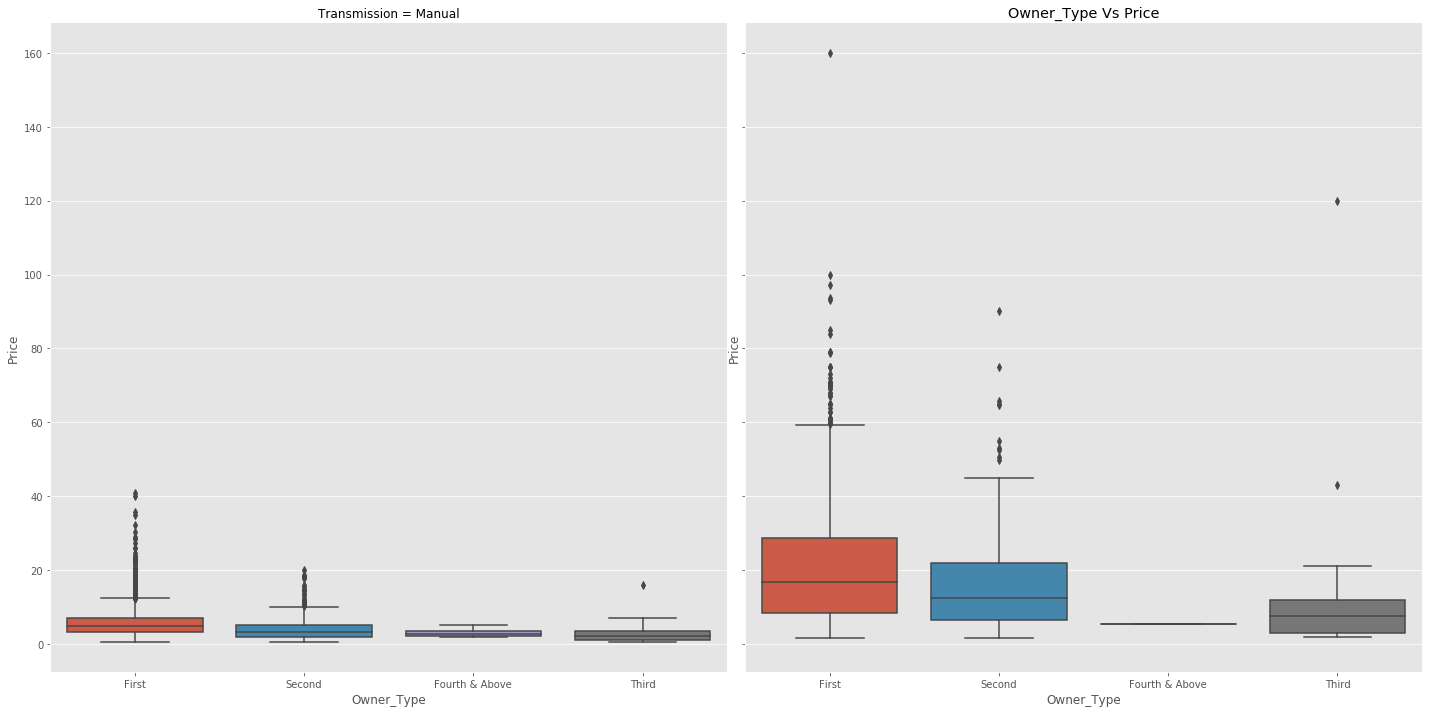

In [87]:
mx = sns.catplot(x="Owner_Type", y="Price", data=df_new, kind="box",col='Transmission', height=10 ,aspect=1)
mx.set(xlabel='Owner_Type')
mx.set(ylabel= 'Price')
plt.title('Owner_Type Vs Price');
plt.show()

1.Price would be central as owners keep changing.We can see outliers getting decreased.

In [88]:
df_orig[(df_orig['Transmission']=='Auto')&(df_orig['Owner_Type']=='Fourth & Above')]

,Sr No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


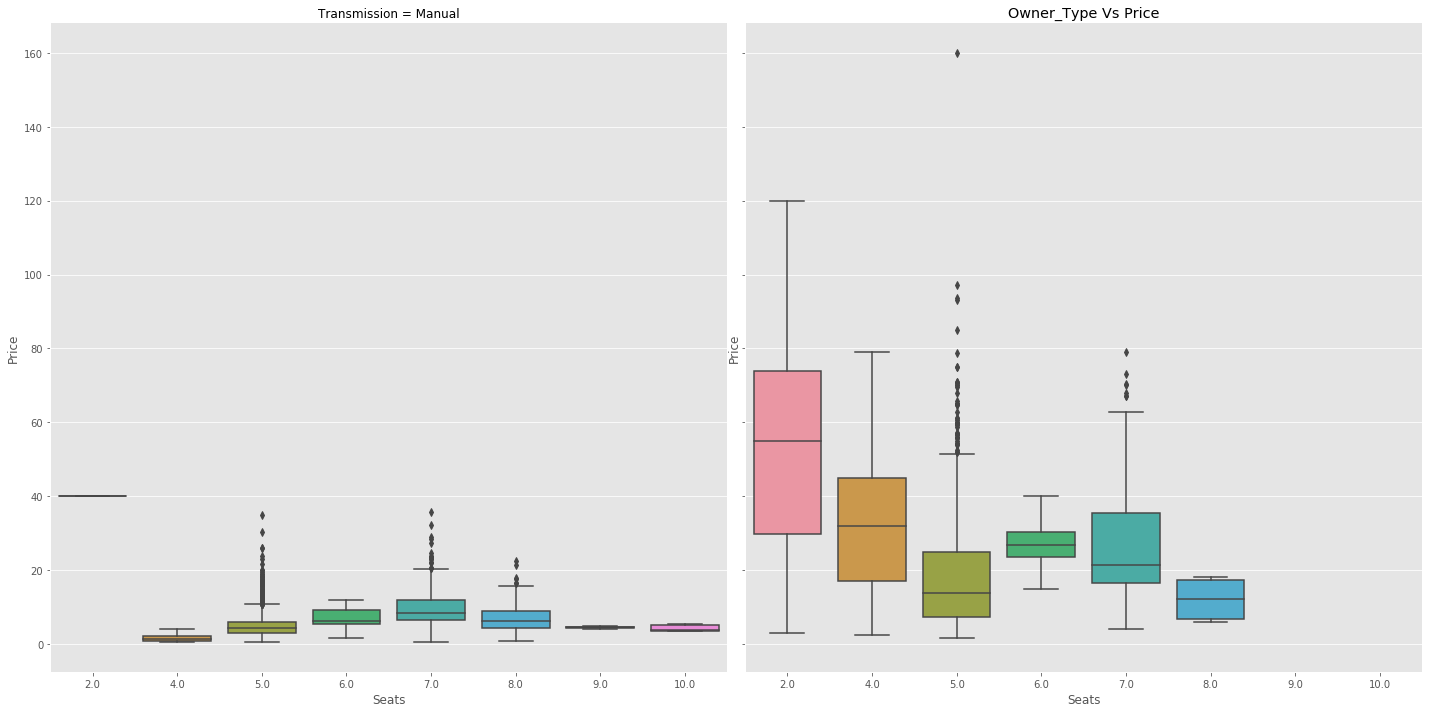

In [89]:
mx = sns.catplot(x="Seats", y="Price", data=df_new, kind="box",col='Transmission', height=10 ,aspect=1)
mx.set(xlabel='Seats')
mx.set(ylabel= 'Price')
plt.title('Owner_Type Vs Price');
plt.show()

In [90]:
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Brand,Model,Variant
Sr No,,,,,,,,,,,,,,,,
0,maruti wagon r lxi,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,4.34 Lakh,maruti,wagon,r lxi
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9.99 Lakh,hyundai,creta,1.6 crdi sx option
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,7.45 Lakh,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,9.56 Lakh,maruti,ertiga,vdi
4,audi a4 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,29.64 Lakh,audi,a4,2.0 tdi multitronic


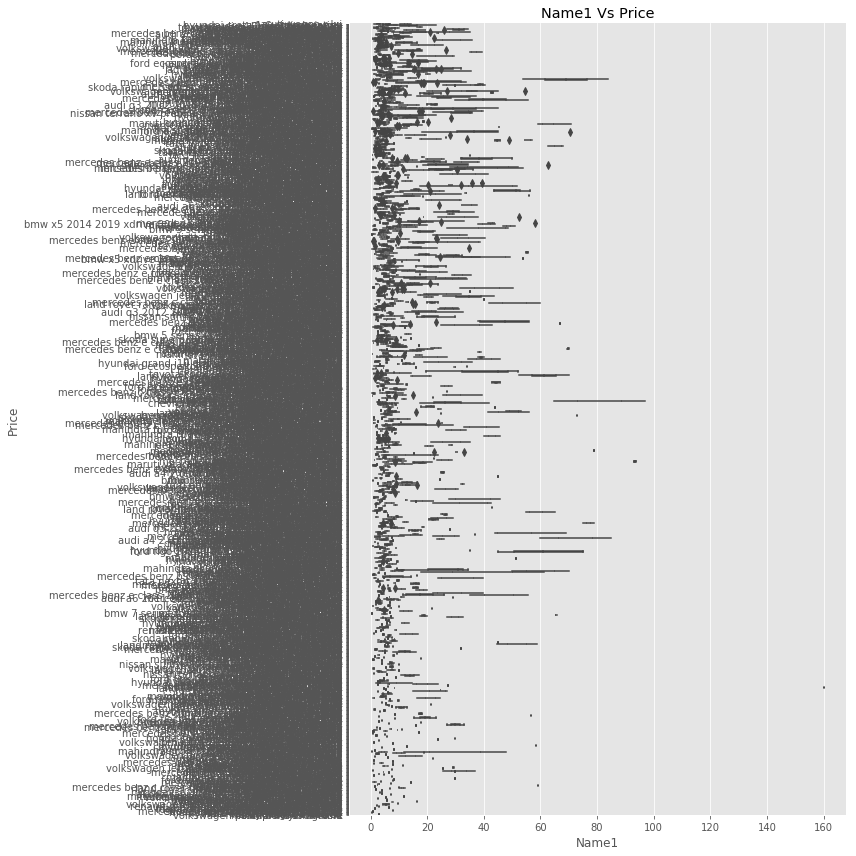

In [93]:
mx = sns.catplot(y="Name", x="Price", data=df_new,kind="box",height=12 ,aspect=1)
mx.set(xlabel='Name1')
mx.set(ylabel= 'Price')
plt.title('Name1 Vs Price')
plt.tight_layout()
plt.show()

In [94]:
df_new[df_new['Name']=='ambassador']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Brand,Model,Variant
Sr No,,,,,,,,,,,,,,,,


In [95]:
df_new[(df_new['Name']=='porsche')&(df_new['Price']<3)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Brand,Model,Variant
Sr No,,,,,,,,,,,,,,,,


In [96]:
df_new['namelen']=[len(n) for n in df_new['Name']]

In [ ]:
df_new['log_power']=np.log(df_new['Power'])

In [ ]:
df_new['log_eng']=np.log(df_new['Engine'])

In [ ]:
df_new['log_eng']=np.log(df_new['Engine'])

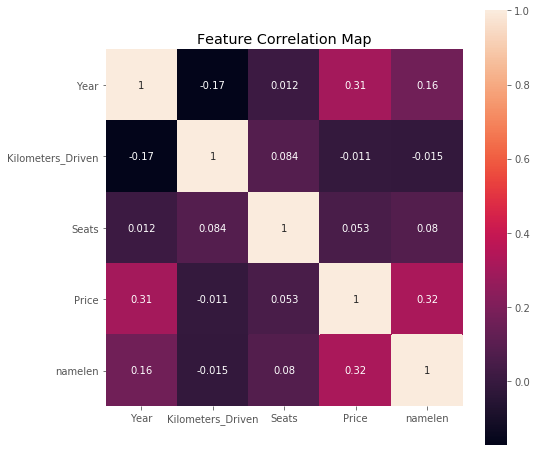

In [99]:
plt.figure(figsize=(8,8))
plt.title('Feature Correlation Map')
sns.heatmap(df_new.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


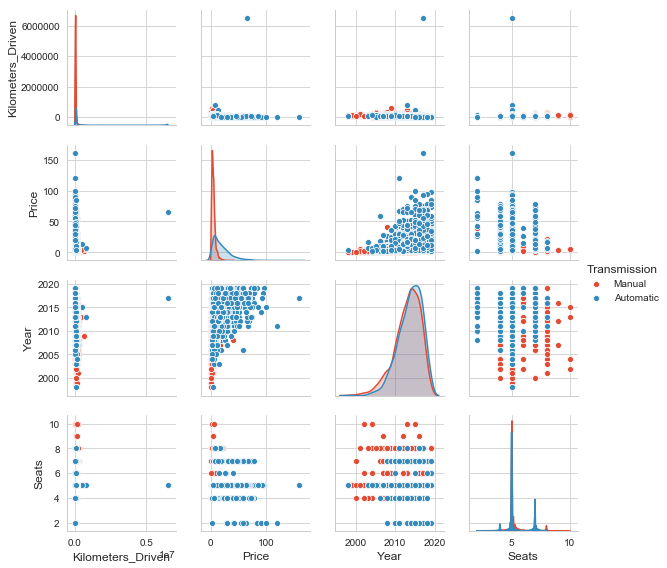

In [100]:
sns.set_style("whitegrid");
sns.pairplot(df_new,hue='Transmission',vars=["Kilometers_Driven","Price","Year","Seats"],height=2);
plt.show()